## The Condition of Air Pollution in Kraków
Using Airly API 

##### Downloading the localisation of sensors located in 10 km distance from Main Square

In [6]:
import requests
import pandas as pd

In [2]:
#APIKEY = #personal Airly API Key 
FORMAT = "application/json"

In [48]:
r = requests.get("https://airapi.airly.eu/v2/installations/nearest?lat=50.0617022&lng=19.9373569&maxDistanceKM=10&maxResults=-1", headers={"apikey": APIKEY, "Accept": FORMAT})

In [50]:
r.status_code

429

In [49]:
r.headers

{'Date': 'Mon, 12 Apr 2021 15:35:06 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '37', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'Location', 'X-RateLimit-Limit-day': '100', 'X-RateLimit-Remaining-day': '0', 'X-Kong-Response-Latency': '1', 'Server': 'kong/1.4.0'}

In [8]:
j = r.json()
data = pd.DataFrame.from_dict(j)
data.head()

,id,location,locationId,address,elevation,airly,sponsor
0,8077,"{'latitude': 50.062006, 'longitude': 19.940984}",8077,"{'country': 'Poland', 'city': 'Krakow', 'stree...",220.38,True,"{'id': 489, 'name': 'Chatham Financial', 'desc..."
1,10211,"{'latitude': 50.059085, 'longitude': 19.933919}",10211,"{'country': 'Poland', 'city': 'Krakow', 'stree...",209.56,True,"{'id': 573, 'name': 'LIFE URBANGREEN', 'descri..."
2,37993,"{'latitude': 50.064539, 'longitude': 19.942561}",10213,"{'country': 'Poland', 'city': 'Krakow', 'stree...",219.13,True,"{'id': 573, 'name': 'LIFE URBANGREEN', 'descri..."
3,37995,"{'latitude': 50.062354, 'longitude': 19.944671}",10216,"{'country': 'Poland', 'city': 'Krakow', 'stree...",216.26,True,"{'id': 573, 'name': 'LIFE URBANGREEN', 'descri..."
4,9910,"{'latitude': 50.062418, 'longitude': 19.928368}",9910,"{'country': 'Poland', 'city': 'Krakow', 'stree...",209.42,True,"{'id': 556, 'name': 'Zostań ambasadorem tego c..."


##### Choosing sensors located in Cracow

In [10]:
data_cracow = pd.DataFrame(sensors[[address.get('city')=='Krakow' for address in data['address']]])
data_cracow.head()

,id,location,locationId,address,elevation,airly,sponsor
0,8077,"{'latitude': 50.062006, 'longitude': 19.940984}",8077,"{'country': 'Poland', 'city': 'Krakow', 'stree...",220.38,True,"{'id': 489, 'name': 'Chatham Financial', 'desc..."
1,10211,"{'latitude': 50.059085, 'longitude': 19.933919}",10211,"{'country': 'Poland', 'city': 'Krakow', 'stree...",209.56,True,"{'id': 573, 'name': 'LIFE URBANGREEN', 'descri..."
2,37993,"{'latitude': 50.064539, 'longitude': 19.942561}",10213,"{'country': 'Poland', 'city': 'Krakow', 'stree...",219.13,True,"{'id': 573, 'name': 'LIFE URBANGREEN', 'descri..."
3,37995,"{'latitude': 50.062354, 'longitude': 19.944671}",10216,"{'country': 'Poland', 'city': 'Krakow', 'stree...",216.26,True,"{'id': 573, 'name': 'LIFE URBANGREEN', 'descri..."
4,9910,"{'latitude': 50.062418, 'longitude': 19.928368}",9910,"{'country': 'Poland', 'city': 'Krakow', 'stree...",209.42,True,"{'id': 556, 'name': 'Zostań ambasadorem tego c..."


In [21]:
sensors = data_cracow[['id','location']]
sensors.head()

,id,location
0,8077,"{'latitude': 50.062006, 'longitude': 19.940984}"
1,10211,"{'latitude': 50.059085, 'longitude': 19.933919}"
2,37993,"{'latitude': 50.064539, 'longitude': 19.942561}"
3,37995,"{'latitude': 50.062354, 'longitude': 19.944671}"
4,9910,"{'latitude': 50.062418, 'longitude': 19.928368}"


#### Displaying selected sensors on map

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx
import geopandas as gpd
%matplotlib inline

In [23]:
lat = [d.get('latitude') for d in sensors['location']]
long = [d.get('longitude') for d in sensors['location']]
coordinates = pd.DataFrame({'id':sensors['id'],'lat':lat,'long':long})


In [24]:
bbox = ((coordinates.long.min()-0.05, coordinates.long.max()+0.05,      
         coordinates.lat.min()-0.05, coordinates.lat.max()+0.05))

In [29]:
gdf = gpd.GeoDataFrame(coordinates, geometry=gpd.points_from_xy(coordinates.long,coordinates.lat))
gdf.set_crs(epsg=4326, inplace=True)

,id,lat,long,geometry
0,8077,50.062006,19.940984,POINT (19.94098 50.06201)
1,10211,50.059085,19.933919,POINT (19.93392 50.05909)
2,37993,50.064539,19.942561,POINT (19.94256 50.06454)
3,37995,50.062354,19.944671,POINT (19.94467 50.06235)
4,9910,50.062418,19.928368,POINT (19.92837 50.06242)
...,...,...,...,...
115,13257,50.083454,20.057153,POINT (20.05715 50.08345)
120,11995,50.107288,20.045784,POINT (20.04578 50.10729)
126,8017,50.019761,20.052830,POINT (20.05283 50.01976)
127,11908,50.082722,20.066146,POINT (20.06615 50.08272)


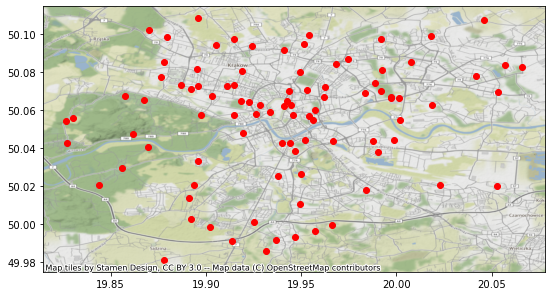

In [30]:
ax = gdf.plot(color="red", figsize=(9, 9))
cx.add_basemap(ax, crs=gdf.crs.to_string())

#### Downloading sensors' data


In [45]:
data17 = pd.DataFrame(columns=['id','PM25','PM10','TEMPERATURE','HUMIDITY','PRESSURE'])
data17['id']=sensors['id']
data22 = pd.DataFrame(columns=['id','PM25','PM10','TEMPERATURE','HUMIDITY','PRESSURE'])
data22['id']=sensors['id']
data05 = pd.DataFrame(columns=['id','PM25','PM10','TEMPERATURE','HUMIDITY','PRESSURE'])
data05['id']=sensors['id']

In [46]:
measurements = ['PM25','PM10','TEMPERATURE','HUMIDITY','PRESSURE']

#for row in gdf.iterrows():
    #id = str(row[0])

for i in range (0,60):   #limited because of limited requests to airly 
    
    id = gdf['id'][i]
    try:
        r = requests.get("https://airapi.airly.eu/v2/measurements/installation?installationId="+str(id), headers={"apikey": APIKEY, "Accept": FORMAT})
    
        #22
        for elem in r.json()['history'][11]['values']:
            for col_name in columns:
                if elem['name']==col_name:
                    value = elem['value']
                    data22.loc[data22['id']==id,col_name] = value
        #17        
        for elem in r.json()['history'][6]['values']:
            for col_name in columns:
                if elem['name']==col_name:
                    value = elem['value']
                    data17.loc[data17['id']==id,col_name] = value
        #5        
        for elem in r.json()['history'][18]['values']:
            for col_name in columns:
                if elem['name']==col_name:
                    value = elem['value']
                    data05.loc[data05['id']==id,col_name] = value
    except: 
        print("Can't download some data")
        
    


Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data
Can't download some data


KeyError: 55

In [47]:
data05.dropna(0,inplace=True)
data17.dropna(0,inplace=True)
data22.dropna(0,inplace=True)
data22.head(60)

,id,PM25,PM10,TEMPERATURE,HUMIDITY,PRESSURE
